# Clustering simples

Tendo em mãos os nomes dos países e o centro geográfico (em lat/long) destes, vou utilizar a metodologia de clustering para agrupa-los em dois e sete clusters (quero ver os continentes!).
Esse foi um exercício do curso do The Data Science Course 2020: Complete Data Science Bootcamp (Udemy)

## Importando bibliotecas relevantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #gráficos seaborn <3

from sklearn.cluster import KMeans #método K-Means Clustering

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Carregando os dados

In [2]:
data = pd.read_csv("Countries-exercise.csv")
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plotagem dos dados

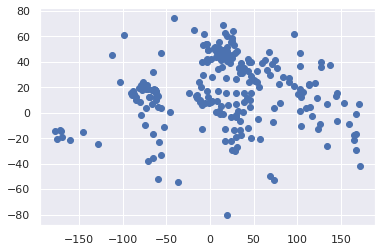

In [3]:
plt.scatter(data['Longitude'],data['Latitude']) #ai que bonitinho!

## Selecionar as features

Criar uma cópia dos dados (atribuido para x) com apenas Lat e Long, pq eles vão ser meus features

In [ ]:
x = data.iloc[:,1:3] #remover a primeira e a segunda colunas do dataframe
#iloc(row indices,column indices)
x

## Clustering

Assumindo apenas 2 clusters

In [5]:
kmeans = KMeans(2) #agora kmeans é um objeto

In [6]:
kmeans.fit(x) #aplica o kmeans aos dados x (só lat e long)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [7]:
clusters = kmeans.fit_predict(x) #ver cada cluster (1 ou 0) de cada observação
clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [8]:
data_clusters = data.copy() #criando uma copia dos dados iniciais
data_clusters['Cluster'] = clusters #adicionando uma coluna com os clusters encontrados
data_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


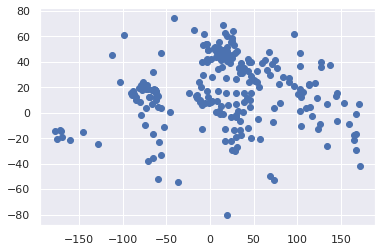

In [9]:
plt.scatter(data_clusters['Longitude'],data_clusters['Latitude']) #bom, mesmo grafico de antes

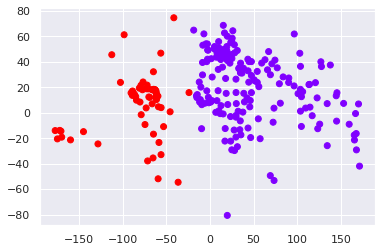

In [10]:
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c=data_clusters['Cluster'], cmap='rainbow')

Bom, parece que o mapa está dividido em dois: leste e oeste :)
Vou tentar com 5, pra ver os continentes rs (América, África, Ásia, Europa e Oceania)

In [28]:
kmeans5 = KMeans(5)

In [29]:
clusters5 = kmeans5.fit_predict(x)
clusters5 #olha os 5 clusters de 0 a 4

array([1, 4, 4, 1, 2, 2, 2, 4, 1, 2, 3, 4, 0, 4, 1, 0, 2, 4, 4, 2, 2, 2,
       0, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 4, 4, 2, 1, 0, 2, 2,
       4, 4, 3, 1, 4, 2, 1, 1, 1, 1, 2, 2, 2, 2, 4, 1, 2, 1, 2, 1, 2, 4,
       2, 2, 4, 2, 0, 1, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 0, 4, 1, 2, 1, 2, 0, 2, 4, 0, 4, 2, 4, 4, 2, 2, 2, 1, 2, 2,
       0, 4, 4, 4, 4, 0, 1, 1, 0, 2, 4, 0, 2, 2, 2, 1, 2, 4, 4, 2, 2, 2,
       0, 1, 2, 2, 2, 4, 4, 1, 0, 2, 2, 2, 0, 2, 0, 0, 4, 2, 1, 4, 4, 0,
       4, 0, 2, 0, 2, 1, 3, 2, 2, 4, 0, 0, 4, 4, 1, 3, 1, 0, 0, 0, 2, 1,
       0, 2, 1, 2, 3, 4, 2, 0, 4, 2, 4, 4, 4, 2, 0, 1, 2, 0, 2, 1, 2, 4,
       4, 1, 2, 2, 1, 2, 2, 2, 4, 1, 4, 2, 1, 2, 2, 0, 4, 4, 0, 3, 1, 2,
       2, 0, 4, 4, 2, 1, 1, 4, 2, 1, 1, 1, 1, 0, 0, 3, 3, 4, 4, 4, 4],
      dtype=int32)

In [30]:
data_clusters5 = data.copy()
data_clusters5['Cluster'] = clusters5 #adicionando uma coluna com os clusters encontrados
data_clusters5

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,4
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,4
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


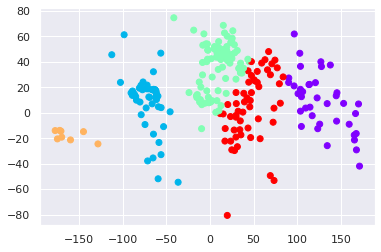

In [31]:
plt.scatter(data_clusters5['Longitude'], data_clusters5['Latitude'], c=data_clusters5['Cluster'], cmap='rainbow')
plt.show()

Oxi, mas num deu o que eu esperava, rs.

## Número de clusters

In [26]:
wcss = [] #vetor vazio
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192212.4818949704,
 151462.83793490715,
 127277.5829200398,
 102891.39703473674,
 84967.41720068289]

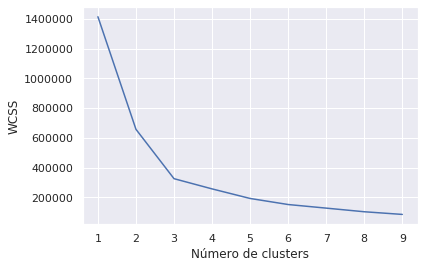

In [27]:
plt.plot(range(1,10),wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()